In [1]:


import pandas as pd

df = pd.read_csv('c2p2.csv')

In [2]:
# Display basic information about the DataFrame
print("Basic Information about the DataFrame:")
print(df.info())

# Display the shape of the DataFrame (number of rows, number of columns)
print("\nShape of the DataFrame:")
print(df.shape)

# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Display the last few rows of the DataFrame
print("\nLast few rows of the DataFrame:")
print(df.tail())

# Display column names of the DataFrame
print("\nColumn Names:")
print(df.columns)

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

# Check for missing values in the DataFrame
print("\nMissing Values:")
print(df.isnull().sum())

Basic Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None

Shape of the DataFrame:
(9568, 5)

Descriptive Statistics:
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451

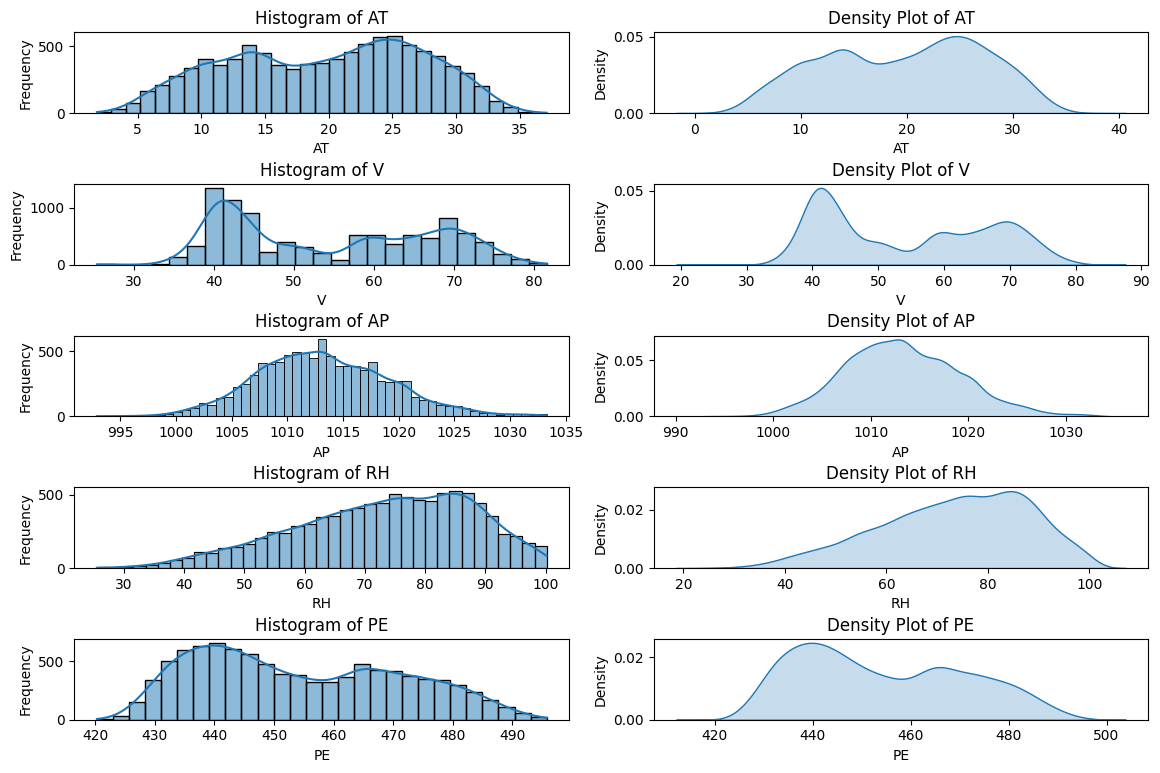

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis grid
fig, axes = plt.subplots(nrows=len(df.columns), ncols=2, figsize=(12, 8))
fig.tight_layout(pad=3.0)

# Loop through each column in the DataFrame
for i, column in enumerate(df.columns):
    # Plot histogram
    sns.histplot(data=df, x=column, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Histogram of {column}")
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel("Frequency")
    
    # Plot density plot
    sns.kdeplot(data=df, x=column, ax=axes[i, 1], fill=True)
    axes[i, 1].set_title(f"Density Plot of {column}")
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel("Density")

# Show the plots
plt.show()

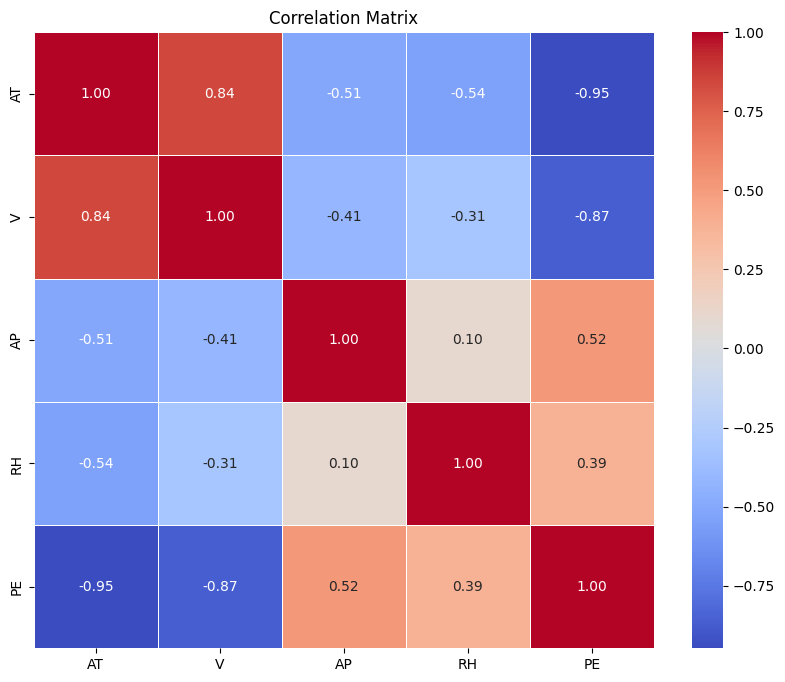

In [4]:


# Assume 'dataframe' is your DataFrame loaded with data

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


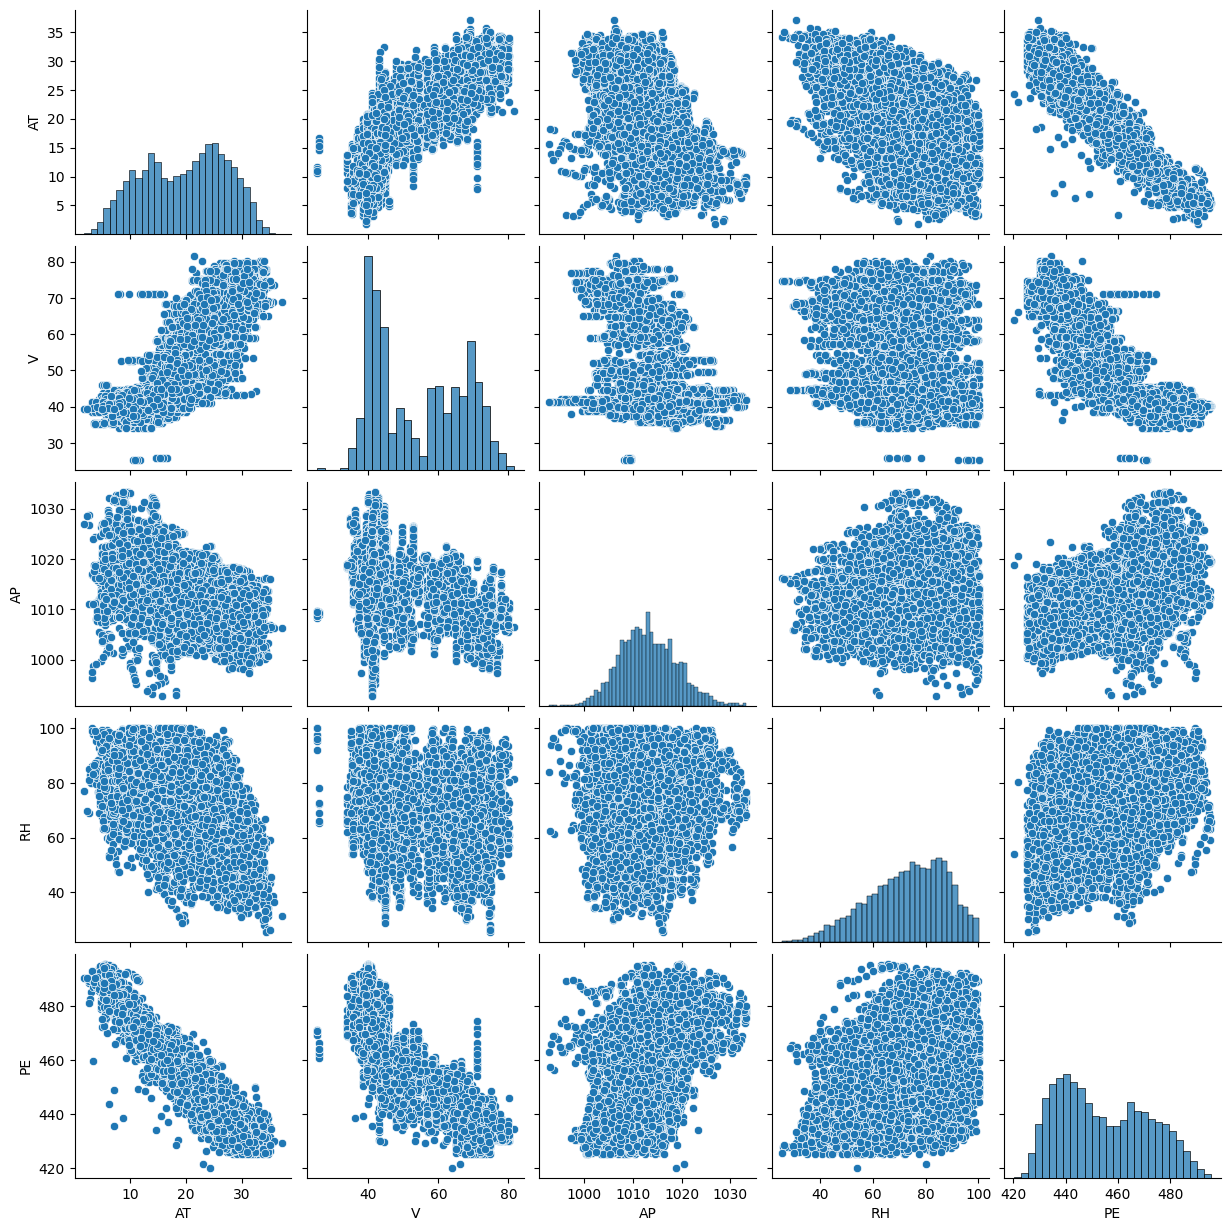

In [5]:
# Pairplot for scatter visualization
sns.pairplot(df)
plt.show()

In [15]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 796.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 5.1 MB/s eta 0:00:03
    --------------------------------------- 0.2/10.6 MB 3.0 MB/s eta 0:00:04
   - -------------------------------------- 0.5/10.6 MB 4.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/10.6 MB 4.9 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/10.6 MB 4.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 6.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/10.6 MB 7.4 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/10.6 MB 8.4 MB/s eta 0:00:01
   ------------- -------------------------- 3.5/10.6 MB 8.5 MB/s eta 0:00:01
   --

In [6]:
from sklearn.model_selection import train_test_split

# Assume 'dataframe' is your DataFrame loaded with data
# Assume 'features' are columns AT, V, AP, RH, and 'target' is column PE

# Separate features and target variable
X = df[['AT', 'V', 'AP', 'RH']]  # Features
y = df['PE']  # Target variable

# Split the data into training and test sets at a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Show the shape of the training and test sets
print("Shape of training features:", X_train.shape)
print("Shape of training target variable:", y_train.shape)
print("Shape of test features:", X_test.shape)
print("Shape of test target variable:", y_test.shape)

Shape of training features: (6697, 4)
Shape of training target variable: (6697,)
Shape of test features: (2871, 4)
Shape of test target variable: (2871,)


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler on the training features and transform them
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test features using the scaler fitted on the training data
X_test_normalized = scaler.transform(X_test)

# Show the shape of the normalized training and test sets
print("Shape of normalized training features:", X_train_normalized.shape)
print("Shape of normalized test features:", X_test_normalized.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()

# Train the model on the training dataset
model.fit(X_train_normalized, y_train)

# Predict the target variable for the training and testing data
y_train_pred = model.predict(X_train_normalized) 
y_test_pred = model.predict(X_test_normalized)

# Calculate the mean squared error for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)

# Display the mean squared error 
print("Mean Squared Error (Training):", mse_train) 
print("Mean Squared Error (Testing):", mse_test)

Shape of normalized training features: (6697, 4)
Shape of normalized test features: (2871, 4)
Mean Squared Error (Training): 20.58083972573869
Mean Squared Error (Testing): 21.239856938225508


In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on training and test data
y_train_pred = model.predict(X_train_normalized)
y_test_pred = model.predict(X_test_normalized)

# Calculate R-squared (R2) for training and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate Mean Squared Error (MSE) for training and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE) for training and test data
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("R-squared (R2) - Training:", r2_train)
print("R-squared (R2) - Test:", r2_test)
print("Mean Absolute Error (MAE) - Training:", mae_train)
print("Mean Absolute Error (MAE) - Test:", mae_test)
print("Mean Squared Error (MSE) - Training:", mse_train)
print("Mean Squared Error (MSE) - Test:", mse_test)
print("Root Mean Squared Error (RMSE) - Training:", rmse_train)
print("Root Mean Squared Error (RMSE) - Test:", rmse_test)


Evaluation Metrics:
R-squared (R2) - Training: 0.9291361021558927
R-squared (R2) - Test: 0.9275484963869204
Mean Absolute Error (MAE) - Training: 3.607182395253241
Mean Absolute Error (MAE) - Test: 3.649932844175462
Mean Squared Error (MSE) - Training: 20.58083972573869
Mean Squared Error (MSE) - Test: 21.239856938225508
Root Mean Squared Error (RMSE) - Training: 4.536611039723231
Root Mean Squared Error (RMSE) - Test: 4.60867192781451


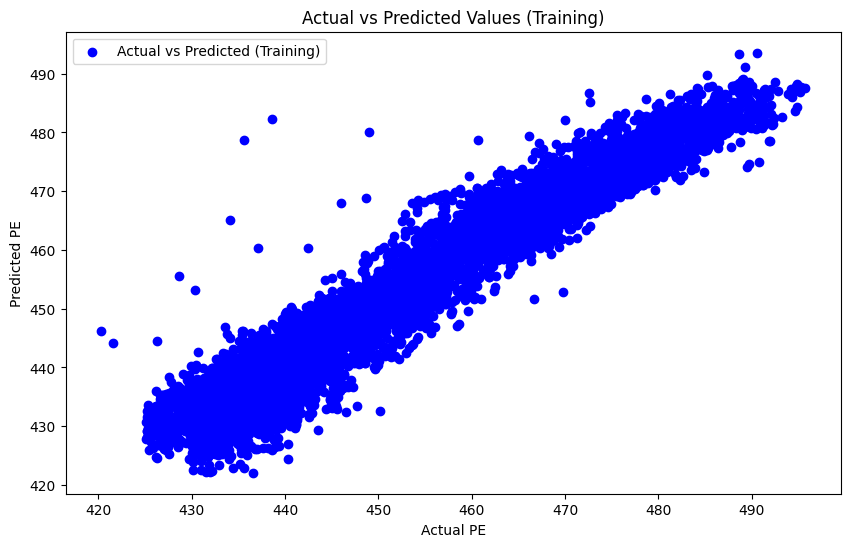

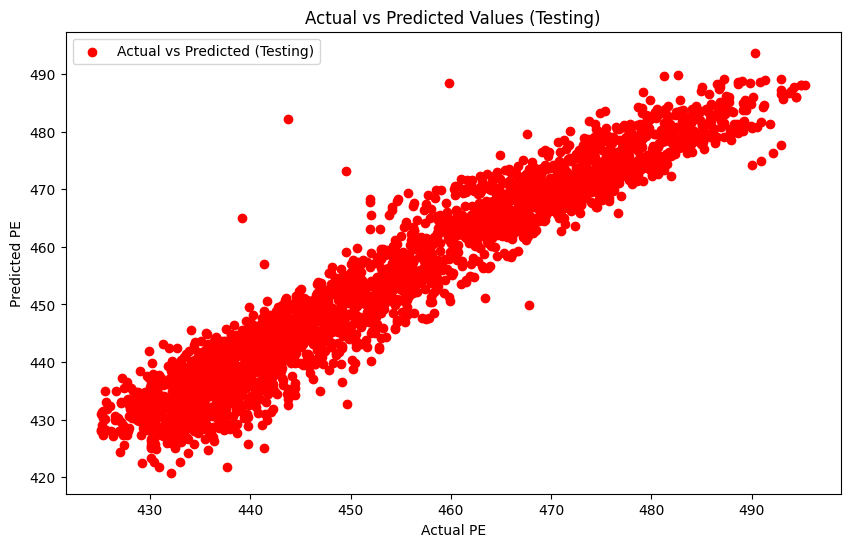

In [10]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for the training data

plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted (Training)')

plt.xlabel('Actual PE')

plt.ylabel('Predicted PE')

plt.title('Actual vs Predicted Values (Training)')

plt.legend()

plt.show()

# Plot actual vs predicted values for the testing data

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_test_pred, color='red', label='Actual vs Predicted (Testing)')

plt.xlabel('Actual PE')

plt.ylabel('Predicted PE')

plt.title('Actual vs Predicted Values (Testing)')

plt.legend()

plt.show()


Random Forest Regression Model Evaluation:
Training MAE: 0.8976854860385283
Testing MAE: 2.393507001044931
Training MAPE: 0.1979014461252703
Testing MAPE: 0.5276199067280531
Training MSE: 1.6173347596013181
Testing MSE: 11.22842455373732
Training R2: 0.9944311968456381
Testing R2: 0.961698600678416


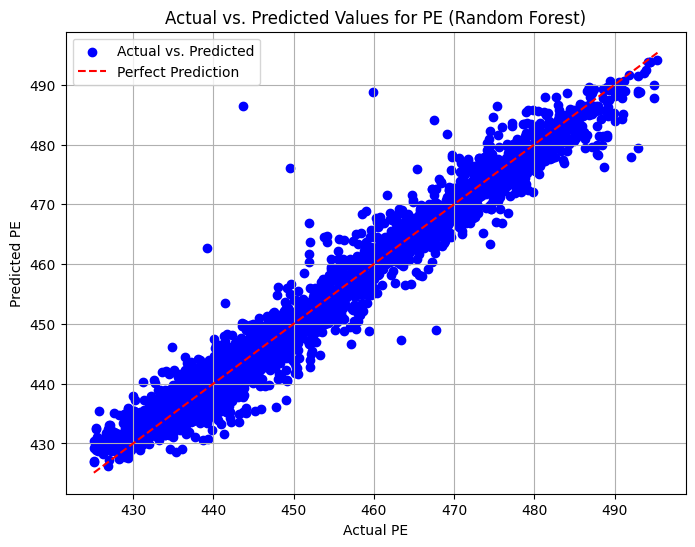

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Create a Random Forest regression model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model on the training dataset
random_forest_model.fit(X_train_normalized, y_train)

# Make predictions on training and test data
y_train_pred_rf = random_forest_model.predict(X_train_normalized)
y_test_pred_rf = random_forest_model.predict(X_test_normalized)

# Calculate evaluation metrics - MAE, MAPE, MSE, R2
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)

r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train_rf = mean_absolute_percentage_error(y_train, y_train_pred_rf)
mape_test_rf = mean_absolute_percentage_error(y_test, y_test_pred_rf)

# Print evaluation metrics
print("Random Forest Regression Model Evaluation:")
print("Training MAE:", mae_train_rf)
print("Testing MAE:", mae_test_rf)
print("Training MAPE:", mape_train_rf)
print("Testing MAPE:", mape_test_rf)
print("Training MSE:", mse_train_rf)
print("Testing MSE:", mse_test_rf)
print("Training R2:", r2_train_rf)
print("Testing R2:", r2_test_rf)

# Visualize actual vs. predicted values for PE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_rf, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted Values for PE (Random Forest)')
plt.xlabel('Actual PE')
plt.ylabel('Predicted PE')
plt.legend()
plt.grid(True)
plt.show()


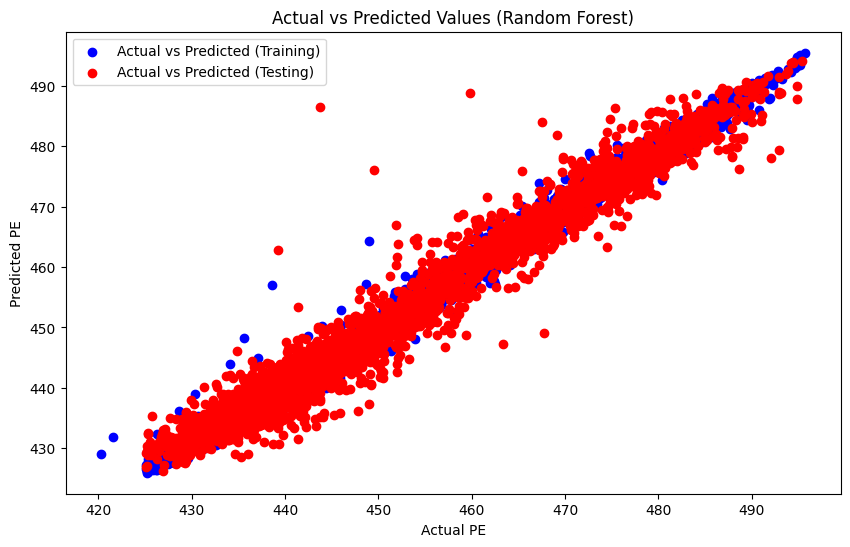

In [12]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for both training and testing data

plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_train_pred_rf, color='blue', label='Actual vs Predicted (Training)')
plt.scatter(y_test, y_test_pred_rf, color='red', label='Actual vs Predicted (Testing)')

plt.xlabel('Actual PE')
plt.ylabel('Predicted PE')

plt.title('Actual vs Predicted Values (Random Forest)')
plt.legend()

plt.show()


d:\LLM-Driven AI Engineering Bootcamp\C2P2 PROJECT\Data\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Regression Model Evaluation:
Training MAE: 20.4781476142833
Testing MAE: 19.545969402062315
Training MAPE: 4.4838693673533925
Testing MAPE: 4.278131651761808
Training MSE: 663.7312713655195
Testing MSE: 607.3615454689485
Training R2: -1.2853579172070178
Testing R2: -1.0717774763724708


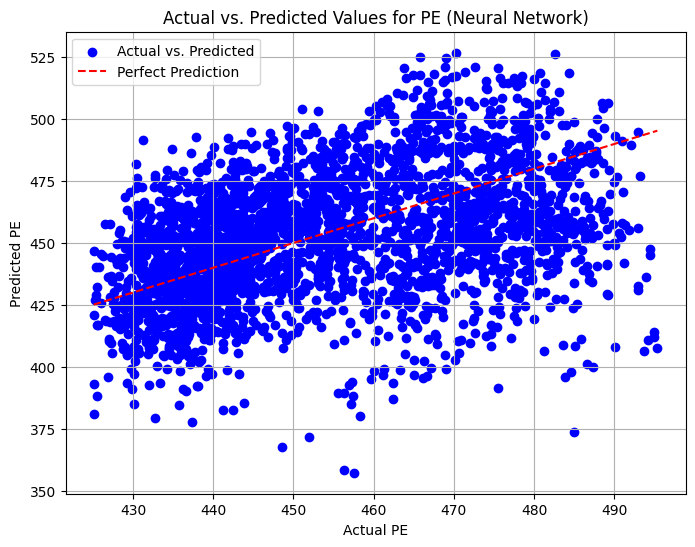

In [16]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Create a Multi-layer Perceptron regressor model
mlp_model = MLPRegressor(random_state=42)

# Train the model on the training dataset
mlp_model.fit(X_train_normalized, y_train)

# Make predictions on training and test data
y_train_pred_mlp = mlp_model.predict(X_train_normalized)
y_test_pred_mlp = mlp_model.predict(X_test_normalized)

# Calculate evaluation metrics - MAE, MAPE, MSE, R2
mae_train_mlp = mean_absolute_error(y_train, y_train_pred_mlp)
mae_test_mlp = mean_absolute_error(y_test, y_test_pred_mlp)

mse_train_mlp = mean_squared_error(y_train, y_train_pred_mlp)
mse_test_mlp = mean_squared_error(y_test, y_test_pred_mlp)

r2_train_mlp = r2_score(y_train, y_train_pred_mlp)
r2_test_mlp = r2_score(y_test, y_test_pred_mlp)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train_mlp = mean_absolute_percentage_error(y_train, y_train_pred_mlp)
mape_test_mlp = mean_absolute_percentage_error(y_test, y_test_pred_mlp)

# Print evaluation metrics
print("Neural Network Regression Model Evaluation:")
print("Training MAE:", mae_train_mlp)
print("Testing MAE:", mae_test_mlp)
print("Training MAPE:", mape_train_mlp)
print("Testing MAPE:", mape_test_mlp)
print("Training MSE:", mse_train_mlp)
print("Testing MSE:", mse_test_mlp)
print("Training R2:", r2_train_mlp)
print("Testing R2:", r2_test_mlp)

# Visualize actual vs. predicted values for PE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_mlp, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted Values for PE (Neural Network)')
plt.xlabel('Actual PE')
plt.ylabel('Predicted PE')
plt.legend()
plt.grid(True)
plt.show()


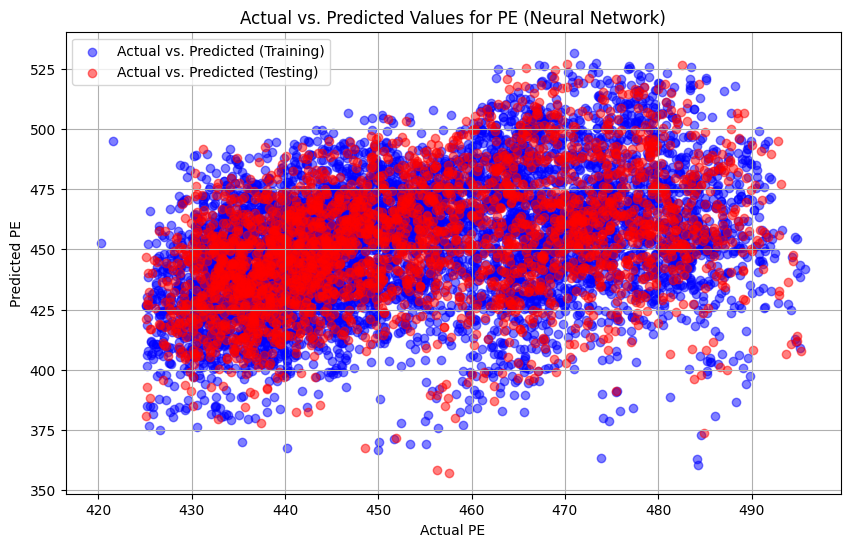

In [17]:
import matplotlib.pyplot as plt

# Create a scatter plot for actual vs. predicted values for both training and testing data
plt.figure(figsize=(10, 6))

# Plot actual vs. predicted values for the training data
plt.scatter(y_train, y_train_pred_mlp, color='blue', label='Actual vs. Predicted (Training)', alpha=0.5)

# Plot actual vs. predicted values for the testing data
plt.scatter(y_test, y_test_pred_mlp, color='red', label='Actual vs. Predicted (Testing)', alpha=0.5)

# Add labels and title
plt.xlabel('Actual PE')
plt.ylabel('Predicted PE')
plt.title('Actual vs. Predicted Values for PE (Neural Network)')

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Show plot
plt.show()


In [19]:
# Calculate Mean Absolute Percentage Error (MAPE) for Random Forest
mape_test_rf = mean_absolute_percentage_error(y_test, y_test_pred_rf)

# Calculate Mean Absolute Percentage Error (MAPE) for Linear Regression
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)



In [21]:
import pandas as pd

# Create a list to store evaluation metrics for LR, RF, and NN
evaluation_data = []

# Add evaluation metrics for Linear Regression (LR) model
evaluation_data.append({'Model': 'Linear Regression (LR)',
                         'R2': r2_test,
                         'MAE': mae_test,
                         'MAPE': mape_test,
                         'MSE': mse_test})

# Add evaluation metrics for Random Forest (RF) model
evaluation_data.append({'Model': 'Random Forest (RF)',
                         'R2': r2_test_rf,
                         'MAE': mae_test_rf,
                         'MAPE': mape_test_rf,
                         'MSE': mse_test_rf})

# Add evaluation metrics for Neural Network (NN) model
evaluation_data.append({'Model': 'Neural Network (NN)',
                         'R2': r2_test_mlp,
                         'MAE': mae_test_mlp,
                         'MAPE': mape_test_mlp,
                         'MSE': mse_test_mlp})

# Create DataFrame from the list of evaluation metrics
evaluation_df = pd.DataFrame(evaluation_data)

# Display the DataFrame
print("Evaluation Metrics for Each Model:")
print(evaluation_df)

# Select the best model based on evaluation metrics (e.g., highest R2, lowest MAE, lowest MSE)
best_model = evaluation_df.loc[evaluation_df['R2'].idxmax()]

print("\nBest Model:")
print(best_model)


Evaluation Metrics for Each Model:
                    Model        R2        MAE      MAPE         MSE
0  Linear Regression (LR)  0.927548   3.649933  0.804955   21.239857
1      Random Forest (RF)  0.961699   2.393507  0.527620   11.228425
2     Neural Network (NN) -1.071777  19.545969  4.278132  607.361545

Best Model:
Model    Random Forest (RF)
R2                 0.961699
MAE                2.393507
MAPE                0.52762
MSE               11.228425
Name: 1, dtype: object


C2 P2 FORCASTING

Linear Regression Model Evaluation:
R2: 0.9291361021558927
MAE: 3.607182395253241
MAPE: 0.7957397523505364
MSE: 20.58083972573869
R2: 0.9275484963869204
MAE: 3.649932844175462
MAPE: 0.8049550708200612
MSE: 21.239856938225508


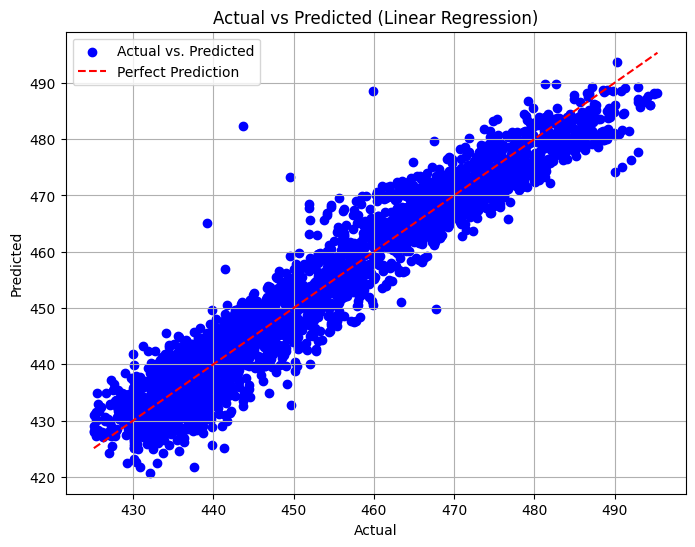


Random Forest Model Evaluation:
R2: 0.9944311968456381
MAE: 0.8976854860385283
MAPE: 0.1979014461252703
MSE: 1.6173347596013181
R2: 0.961698600678416
MAE: 2.393507001044931
MAPE: 0.5276199067280531
MSE: 11.22842455373732


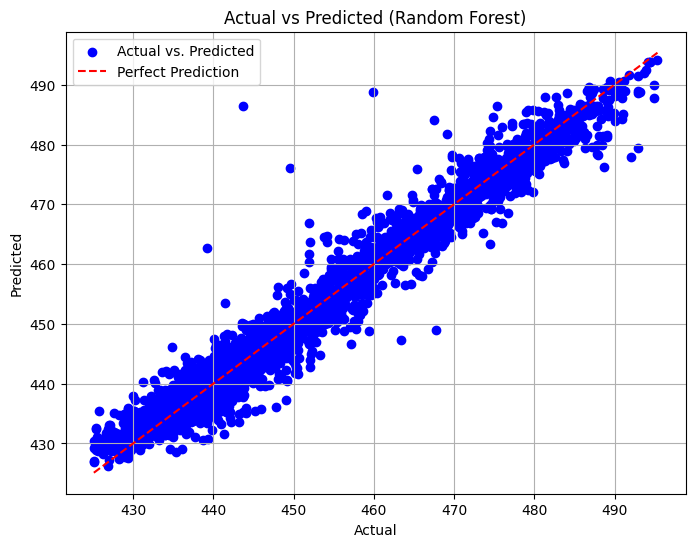

d:\LLM-Driven AI Engineering Bootcamp\C2P2 PROJECT\Data\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Neural Network Model Evaluation:
R2: -1.2853579172070178
MAE: 20.4781476142833
MAPE: 4.4838693673533925
MSE: 663.7312713655195
R2: -1.0717774763724708
MAE: 19.545969402062315
MAPE: 4.278131651761808
MSE: 607.3615454689485


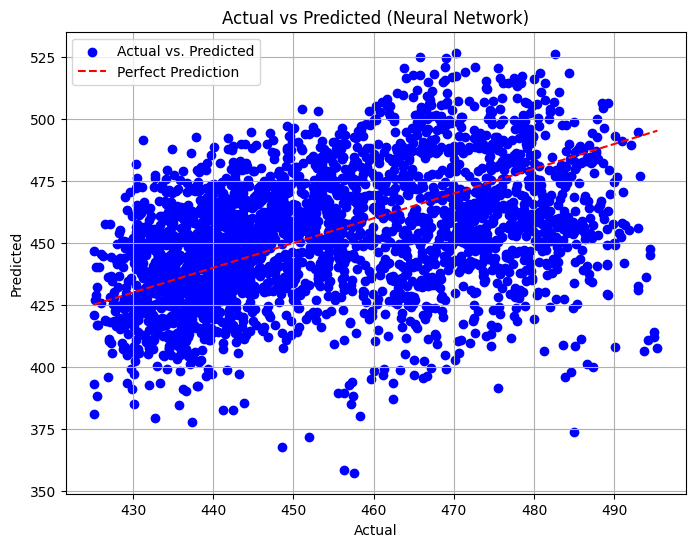


Best Model: Random Forest


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to load and preprocess the data
def load_and_preprocess_data(file_path):
    df = pd.read_csv('c2p2.csv')
    X = df[['AT', 'V', 'AP', 'RH']]  # Features
    y = df['PE']  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = MinMaxScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    return X_train_normalized, X_test_normalized, y_train, y_test

# Function to train Linear Regression model
def train_linear_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model.predict(X_train), model.predict(X_test)

# Function to train Random Forest model
def train_random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model.predict(X_train), model.predict(X_test)

# Function to train Neural Network model
def train_neural_network(X_train, X_test, y_train, y_test):
    model = MLPRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model.predict(X_train), model.predict(X_test)

# Function to evaluate model and print metrics
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print("R2:", r2)
    print("MAE:", mae)
    print("MAPE:", mape)
    print("MSE:", mse)

# Function to visualize actual vs predicted values
def visualize_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', label='Actual vs. Predicted')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], linestyle='--', color='red', label='Perfect Prediction')
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load and preprocess the data
X_train, X_test, y_train, y_test = load_and_preprocess_data('c2p2.csv')

# Train Linear Regression model
lr_train_pred, lr_test_pred = train_linear_regression(X_train, X_test, y_train, y_test)
print("Linear Regression Model Evaluation:")
evaluate_model(y_train, lr_train_pred)
evaluate_model(y_test, lr_test_pred)
visualize_actual_vs_predicted(y_test, lr_test_pred, "Actual vs Predicted (Linear Regression)")

# Train Random Forest model
rf_train_pred, rf_test_pred = train_random_forest(X_train, X_test, y_train, y_test)
print("\nRandom Forest Model Evaluation:")
evaluate_model(y_train, rf_train_pred)
evaluate_model(y_test, rf_test_pred)
visualize_actual_vs_predicted(y_test, rf_test_pred, "Actual vs Predicted (Random Forest)")

# Train Neural Network model
nn_train_pred, nn_test_pred = train_neural_network(X_train, X_test, y_train, y_test)
print("\nNeural Network Model Evaluation:")
evaluate_model(y_train, nn_train_pred)
evaluate_model(y_test, nn_test_pred)
visualize_actual_vs_predicted(y_test, nn_test_pred, "Actual vs Predicted (Neural Network)")

# Compare models and select the best one based on R2 score
models = ['Linear Regression', 'Random Forest', 'Neural Network']
r2_scores = [r2_score(y_test, lr_test_pred), r2_score(y_test, rf_test_pred), r2_score(y_test, nn_test_pred)]
best_model_index = np.argmax(r2_scores)
print("\nBest Model:", models[best_model_index])


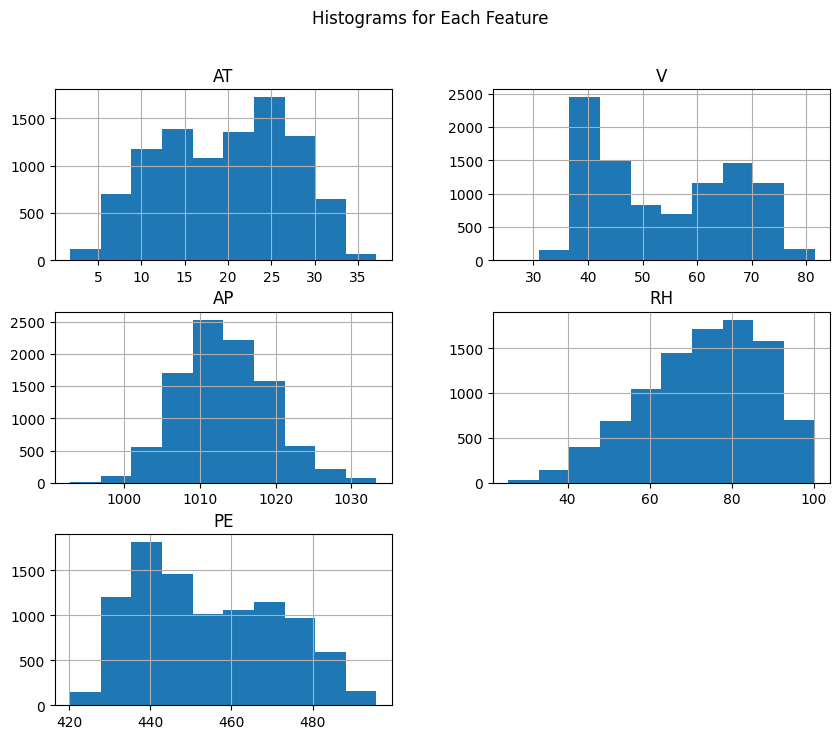

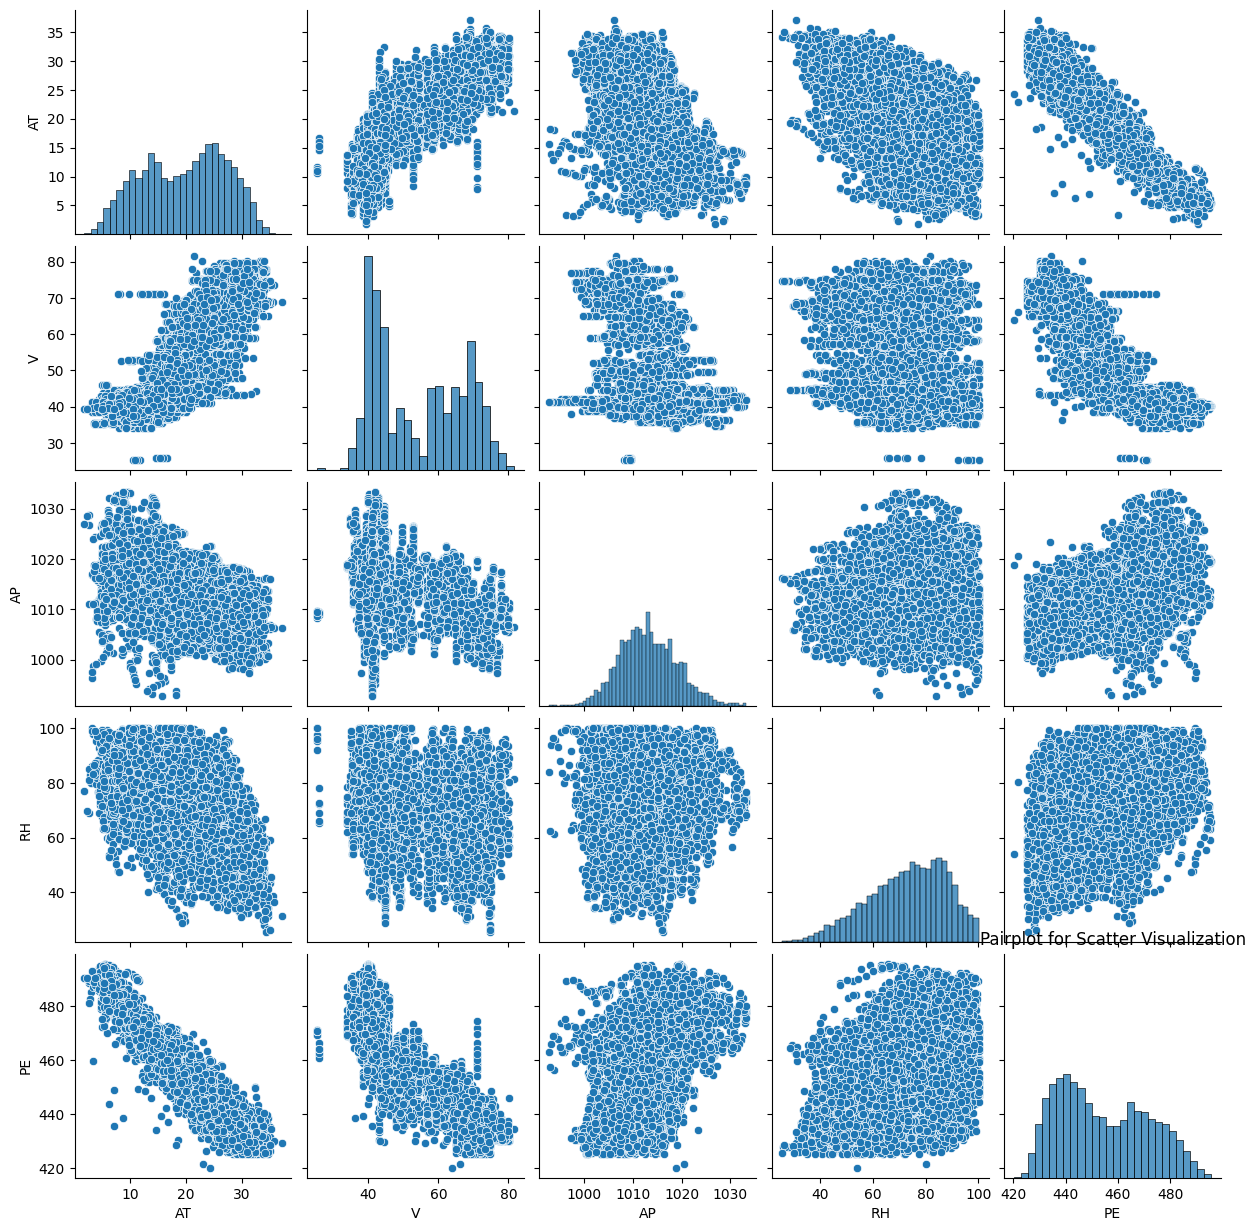

Linear Regression Model Evaluation:
R2: 0.9291361021558927
MAE: 3.607182395253241
MAPE: 0.7957397523505364
MSE: 20.58083972573869
R2: 0.9275484963869204
MAE: 3.649932844175462
MAPE: 0.8049550708200612
MSE: 21.239856938225508


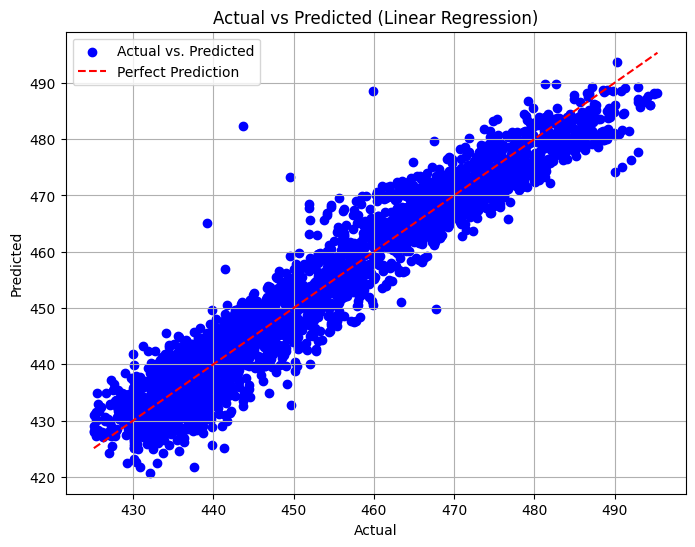


Random Forest Model Evaluation:
R2: 0.9944311968456381
MAE: 0.8976854860385283
MAPE: 0.1979014461252703
MSE: 1.6173347596013181
R2: 0.961698600678416
MAE: 2.393507001044931
MAPE: 0.5276199067280531
MSE: 11.22842455373732


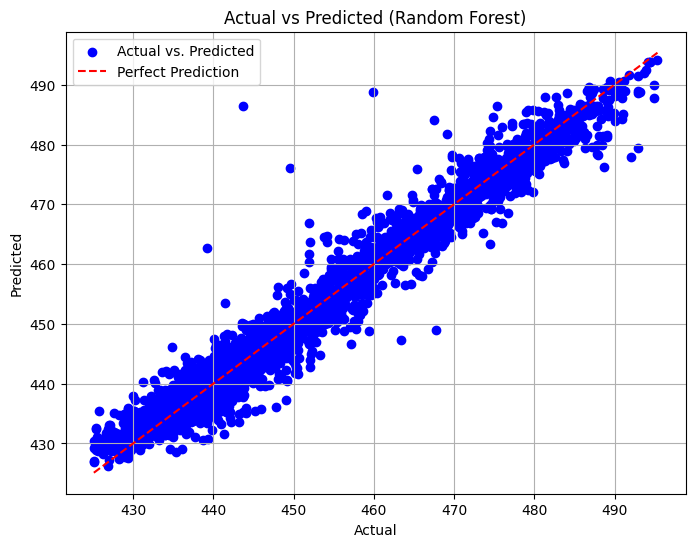

d:\LLM-Driven AI Engineering Bootcamp\C2P2 PROJECT\Data\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Neural Network Model Evaluation:
R2: -1.2853579172070178
MAE: 20.4781476142833
MAPE: 4.4838693673533925
MSE: 663.7312713655195
R2: -1.0717774763724708
MAE: 19.545969402062315
MAPE: 4.278131651761808
MSE: 607.3615454689485


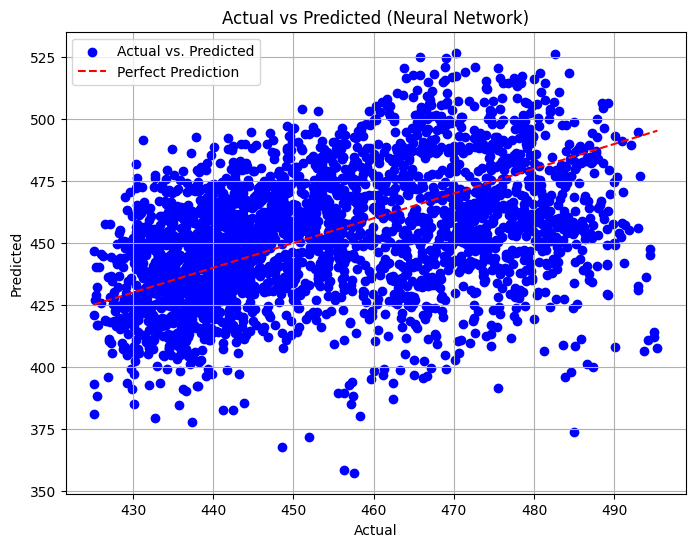


Best Model: Random Forest


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to load and preprocess the data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    X = df[['AT', 'V', 'AP', 'RH']]  # Features
    y = df['PE']  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = MinMaxScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    return X_train_normalized, X_test_normalized, y_train, y_test, df

# Function to train Linear Regression model
def train_linear_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model.predict(X_train), model.predict(X_test)

# Function to train Random Forest model
def train_random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model.predict(X_train), model.predict(X_test)

# Function to train Neural Network model
def train_neural_network(X_train, X_test, y_train, y_test):
    model = MLPRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model.predict(X_train), model.predict(X_test)

# Function to evaluate model and print metrics
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print("R2:", r2)
    print("MAE:", mae)
    print("MAPE:", mape)
    print("MSE:", mse)

# Function to visualize actual vs predicted values
def visualize_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', label='Actual vs. Predicted')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], linestyle='--', color='red', label='Perfect Prediction')
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load and preprocess the data
X_train, X_test, y_train, y_test, df = load_and_preprocess_data('c2p2.csv')

# Plot histograms for each feature
df.hist(figsize=(10, 8))
plt.suptitle('Histograms for Each Feature')
plt.show()

# Pairplot for scatter visualization
sns.pairplot(df)
plt.title('Pairplot for Scatter Visualization')
plt.show()

# Train Linear Regression model
lr_train_pred, lr_test_pred = train_linear_regression(X_train, X_test, y_train, y_test)
print("Linear Regression Model Evaluation:")
evaluate_model(y_train, lr_train_pred)
evaluate_model(y_test, lr_test_pred)
visualize_actual_vs_predicted(y_test, lr_test_pred, "Actual vs Predicted (Linear Regression)")

# Train Random Forest model
rf_train_pred, rf_test_pred = train_random_forest(X_train, X_test, y_train, y_test)
print("\nRandom Forest Model Evaluation:")
evaluate_model(y_train, rf_train_pred)
evaluate_model(y_test, rf_test_pred)
visualize_actual_vs_predicted(y_test, rf_test_pred, "Actual vs Predicted (Random Forest)")

# Train Neural Network model
nn_train_pred, nn_test_pred = train_neural_network(X_train, X_test, y_train, y_test)
print("\nNeural Network Model Evaluation:")
evaluate_model(y_train, nn_train_pred)
evaluate_model(y_test, nn_test_pred)
visualize_actual_vs_predicted(y_test, nn_test_pred, "Actual vs Predicted (Neural Network)")

# Compare models and select the best one based on R2 score
models = ['Linear Regression', 'Random Forest', 'Neural Network']
r2_scores = [r2_score(y_test, lr_test_pred), r2_score(y_test, rf_test_pred), r2_score(y_test, nn_test_pred)]
best_model_index = np.argmax(r2_scores)
print("\nBest Model:", models[best_model_index])


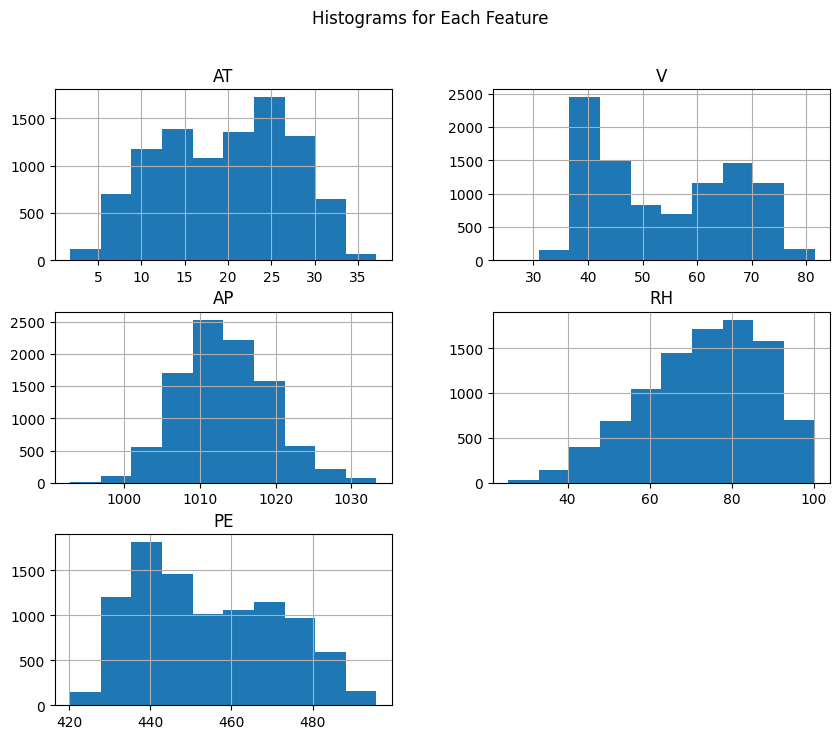

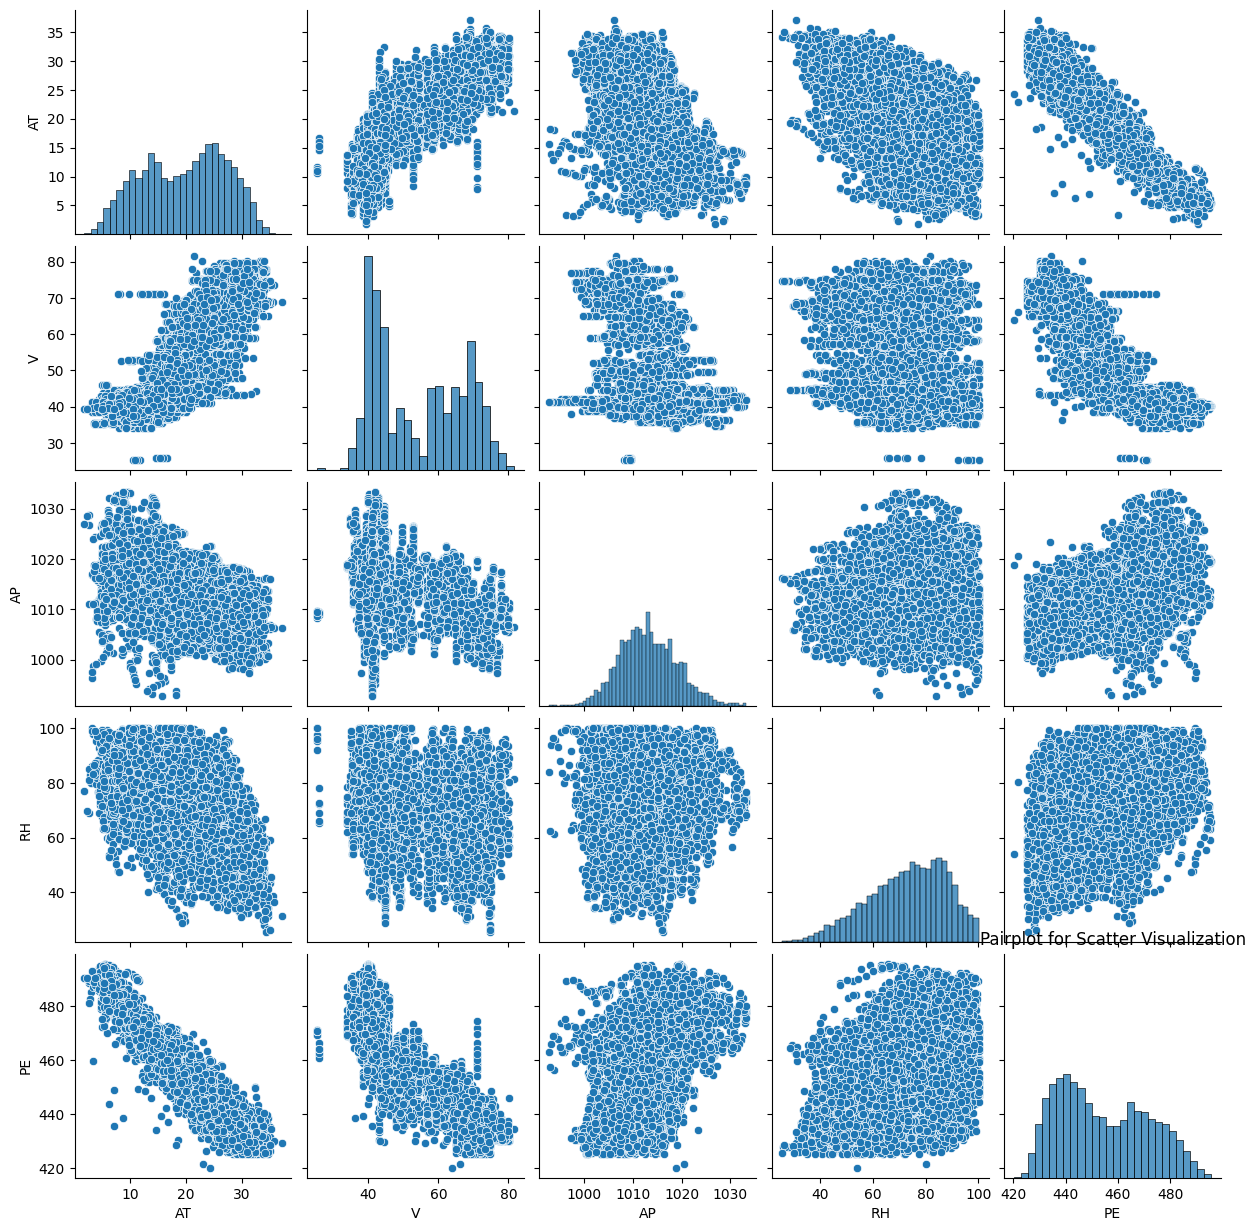

Linear Regression Model Evaluation:
R2: 0.9291361021558927
MAE: 3.607182395253241
MAPE: 0.7957397523505364
MSE: 20.58083972573869
R2: 0.9275484963869204
MAE: 3.649932844175462
MAPE: 0.8049550708200612
MSE: 21.239856938225508


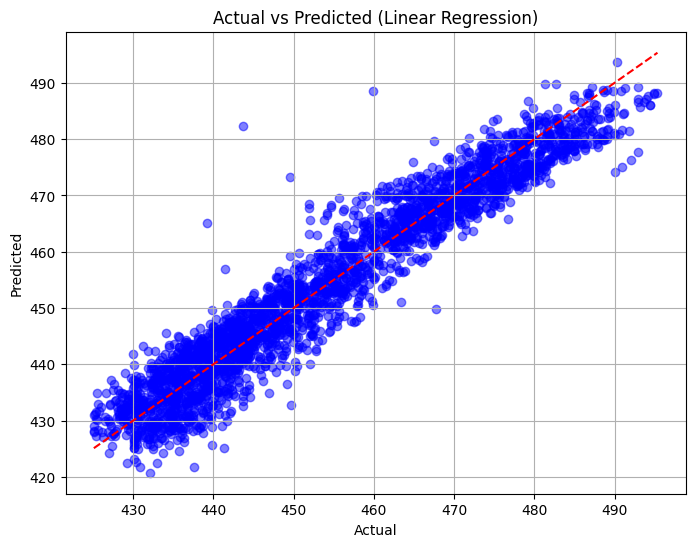


Random Forest Model Evaluation:
R2: 0.9944311968456381
MAE: 0.8976854860385283
MAPE: 0.1979014461252703
MSE: 1.6173347596013181
R2: 0.961698600678416
MAE: 2.393507001044931
MAPE: 0.5276199067280531
MSE: 11.22842455373732


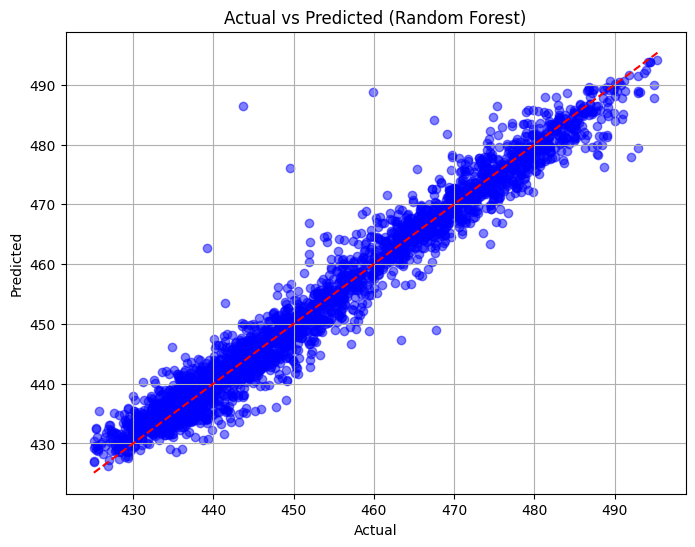

d:\LLM-Driven AI Engineering Bootcamp\C2P2 PROJECT\Data\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Neural Network Model Evaluation:
R2: -1.2853579172070178
MAE: 20.4781476142833
MAPE: 4.4838693673533925
MSE: 663.7312713655195
R2: -1.0717774763724708
MAE: 19.545969402062315
MAPE: 4.278131651761808
MSE: 607.3615454689485


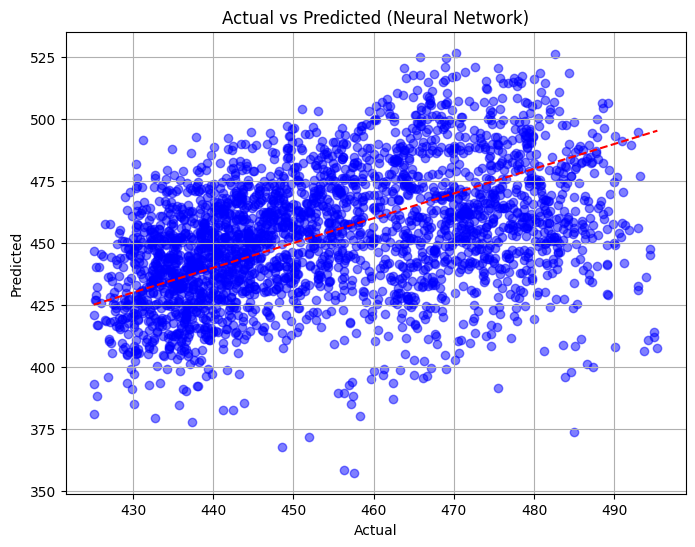

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to load and preprocess the data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    X = df[['AT', 'V', 'AP', 'RH']]  # Features
    y = df['PE']  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = MinMaxScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    return X_train_normalized, X_test_normalized, y_train, y_test, df

# Function to train Linear Regression model
def train_linear_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model.predict(X_train), model.predict(X_test)

# Function to train Random Forest model
def train_random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model.predict(X_train), model.predict(X_test)

# Function to train Neural Network model
def train_neural_network(X_train, X_test, y_train, y_test):
    model = MLPRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model.predict(X_train), model.predict(X_test)

# Function to evaluate model and print metrics
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print("R2:", r2)
    print("MAE:", mae)
    print("MAPE:", mape)
    print("MSE:", mse)

# Function to visualize actual vs predicted values
def visualize_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], linestyle='--', color='red')
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()

# Load and preprocess the data
X_train, X_test, y_train, y_test, df = load_and_preprocess_data('c2p2.csv')

# Plot histograms for each feature
df.hist(figsize=(10, 8))
plt.suptitle('Histograms for Each Feature')
plt.show()

# Pairplot for scatter visualization
sns.pairplot(df)
plt.title('Pairplot for Scatter Visualization')
plt.show()

# Train Linear Regression model
lr_train_pred, lr_test_pred = train_linear_regression(X_train, X_test, y_train, y_test)
print("Linear Regression Model Evaluation:")
evaluate_model(y_train, lr_train_pred)
evaluate_model(y_test, lr_test_pred)
visualize_actual_vs_predicted(y_test, lr_test_pred, "Actual vs Predicted (Linear Regression)")

# Train Random Forest model
rf_train_pred, rf_test_pred = train_random_forest(X_train, X_test, y_train, y_test)
print("\nRandom Forest Model Evaluation:")
evaluate_model(y_train, rf_train_pred)
evaluate_model(y_test, rf_test_pred)
visualize_actual_vs_predicted(y_test, rf_test_pred, "Actual vs Predicted (Random Forest)")

# Train Neural Network model
nn_train_pred, nn_test_pred = train_neural_network(X_train, X_test, y_train, y_test)
print("\nNeural Network Model Evaluation:")
evaluate_model(y_train, nn_train_pred)
evaluate_model(y_test, nn_test_pred)
visualize_actual_vs_predicted(y_test, nn_test_pred, "Actual vs Predicted (Neural Network)")

# Compare models and select the best one based on R2 score
models = ['Linear Regression', 'Random Forest', 'Neural Network']
r2_scores = [r2_score(y_test, lr_test_pred), r2_score(y_test, rf_test_pred), r2_score(y_test, nn_test_pred)]
best_model_index = np.argmax(r2_scores)


In [25]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Load the data
df = pd.read_csv('c2p2.csv')

# Function to preprocess the data
def preprocess_data(df):
    scaler = MinMaxScaler()
    X = df[['AT', 'V', 'AP', 'RH']].values
    X_normalized = scaler.fit_transform(X)
    return X_normalized

# Function to make predictions using Linear Regression
def predict_linear_regression(data):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model.predict(data)

# Function to make predictions using Random Forest
def predict_random_forest(data):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model.predict(data)

# Function to make predictions using Neural Network
def predict_neural_network(data):
    model = MLPRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model.predict(data)

# Function to handle prediction button click
def predict():
    # Get the selected model from the StringVar
    model_name = selected_model.get()
    
    # Determine which model function to call based on the selected model
    if model_name == 'Linear Regression':
        prediction = predict_linear_regression(data)
    elif model_name == 'Random Forest':
        prediction = predict_random_forest(data)
    elif model_name == 'Neural Network':
        prediction = predict_neural_network(data)
    else:
        prediction = "Select a model"

# Create the main application window
root = tk.Tk()
root.title("Power Plant Prediction")

# Preprocess the data
X_train = preprocess_data(df[['AT', 'V', 'AP', 'RH']])
y_train = df['PE'].values.reshape(-1, 1)

# Dropdown to select model
model_label = tk.Label(root, text="Select Model:")
model_label.grid(row=0, column=0, padx=5, pady=5, sticky="w")

selected_model = tk.StringVar()
model_dropdown = ttk.Combobox(root, textvariable=selected_model, state="readonly")
model_dropdown['values'] = ('Linear Regression', 'Random Forest', 'Neural Network')
model_dropdown.grid(row=0, column=1, padx=5, pady=5, sticky="w")
model_dropdown.current(0)

# Entry fields for input data
inputs_label = tk.Label(root, text="Input Data:")
inputs_label.grid(row=1, column=0, padx=5, pady=5, sticky="w")

entries = []
for i, feature in enumerate(['AT', 'V', 'AP', 'RH']):
    entry_label = tk.Label(root, text=feature)
    entry_label.grid(row=i+2, column=0, padx=5, pady=5, sticky="w")
    entry = tk.Entry(root)
    entry.grid(row=i+2, column=1, padx=5, pady=5, sticky="w")
    entries.append(entry)

# Button to predict
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.grid(row=6, column=0, columnspan=2, padx=5, pady=10)

# Label to display result
result_label = tk.Label(root, text="")
result_label.grid(row=7, column=0, columnspan=2, padx=5, pady=5)

# Run the main event loop
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\shiva\AppData\Local\Temp\ipykernel_45700\2844741720.py", line 41, in predict
    prediction = selected_model(data)
TypeError: 'StringVar' object is not callable


KeyboardInterrupt: 

In [1]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Load the data
df = pd.read_csv('c2p2.csv')

# Function to preprocess the data
def preprocess_data(df):
    scaler = MinMaxScaler()
    X = df[['AT', 'V', 'AP', 'RH']].values
    X_normalized = scaler.fit_transform(X)
    return X_normalized

# Function to make predictions using Linear Regression
def predict_linear_regression(data):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model.predict(data)

# Function to make predictions using Random Forest
def predict_random_forest(data):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model.predict(data)

# Function to make predictions using Neural Network
def predict_neural_network(data):
    model = MLPRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model.predict(data)

# Function to handle prediction button click
def predict():
    data = np.array([[float(entry.get()) for entry in entries]])
    model_name = selected_model.get()
    if model_name == 'Linear Regression':
        prediction = predict_linear_regression(data)
    elif model_name == 'Random Forest':
        prediction = predict_random_forest(data)
    elif model_name == 'Neural Network':
        prediction = predict_neural_network(data)
    else:
        prediction = "Select a model"
    
    # Extract the prediction value from the array
    if isinstance(prediction, np.ndarray):
        prediction_value = prediction[0]
    else:
        prediction_value = prediction
    
    # Update the result label with the prediction
    result_label.config(text=f"Predicted PE: {prediction_value:.2f}")

# Create the main application window
root = tk.Tk()
root.title("Power Plant Prediction")

# Preprocess the data
X_train = preprocess_data(df[['AT', 'V', 'AP', 'RH']])
y_train = df['PE'].values.reshape(-1, 1)

# Dropdown to select model
model_label = tk.Label(root, text="Select Model:")
model_label.grid(row=0, column=0, padx=5, pady=5, sticky="w")

selected_model = tk.StringVar()
model_dropdown = ttk.Combobox(root, textvariable=selected_model, state="readonly")
model_dropdown['values'] = ('Linear Regression', 'Random Forest', 'Neural Network')
model_dropdown.grid(row=0, column=1, padx=5, pady=5, sticky="w")
model_dropdown.current(0)

# Entry fields for input data
inputs_label = tk.Label(root, text="Input Data:")
inputs_label.grid(row=1, column=0, padx=5, pady=5, sticky="w")

entries = []
for i, feature in enumerate(['AT', 'V', 'AP', 'RH']):
    entry_label = tk.Label(root, text=feature)
    entry_label.grid(row=i+2, column=0, padx=5, pady=5, sticky="w")
    entry = tk.Entry(root)
    entry.grid(row=i+2, column=1, padx=5, pady=5, sticky="w")
    entries.append(entry)

# Button to predict
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.grid(row=6, column=0, columnspan=2, padx=5, pady=10)

# Label to display result
result_label = tk.Label(root, text="")
result_label.grid(row=7, column=0, columnspan=2, padx=5, pady=5)

# Run the main event loop
root.mainloop()
